# 4.9 Intro to Data Visualization with Python

## This script contains the following points:

### 1.Creating Bar Charts
### 2.Creating Histogram & Scatterplot
### 3.Finding bias and correcting them in the database
### 4.Sampling Data
### 5.Creating Line Charts

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining path and import dataframe
path=r'C:\Users\olilo\OneDrive\Dokumente\CF\Data Analytics Immersion_Week 8-12\2023-08-28 Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_agg.pkl'))

In [3]:
# Output check
ords_prods_merge.shape

(32404859, 26)

In [4]:
# Column rename
ords_prods_merge.rename(columns = {'order_dow' : 'orders_day_of_week'}, inplace = True)

In [5]:
# Output check
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,Spending_flag,median_days_order,frequency_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


### 1.Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

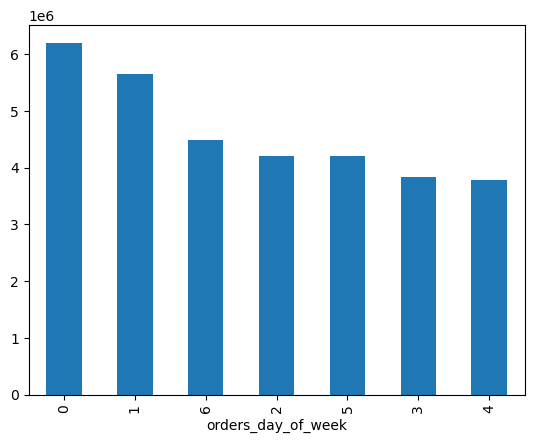

In [6]:
# Creating a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

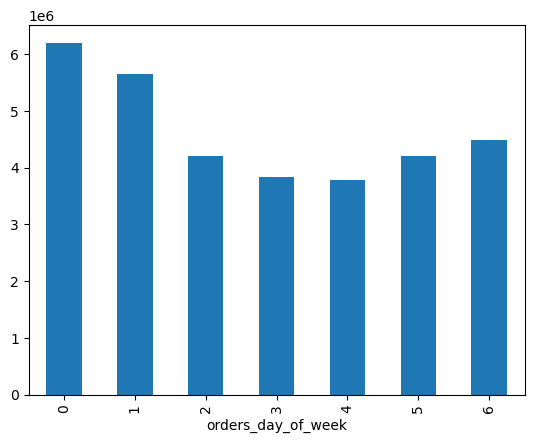

In [7]:
# Creating a bar chart with sort index funktion
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
# Printing the numbers with count conclusion
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

Text(0.5, 1.0, 'Count orders day of week')

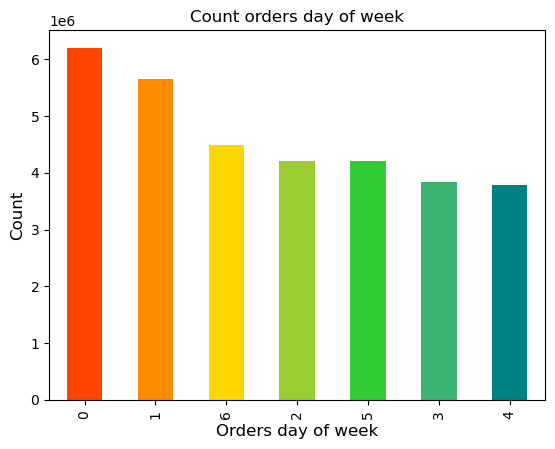

In [9]:
# Color changing, bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ["orangered", "darkorange", "gold", "yellowgreen", "limegreen", "mediumseagreen", "teal"])

plt.xlabel("Orders day of week", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count orders day of week", fontsize=12)

Text(0.5, 1.0, 'Count orders day of week')

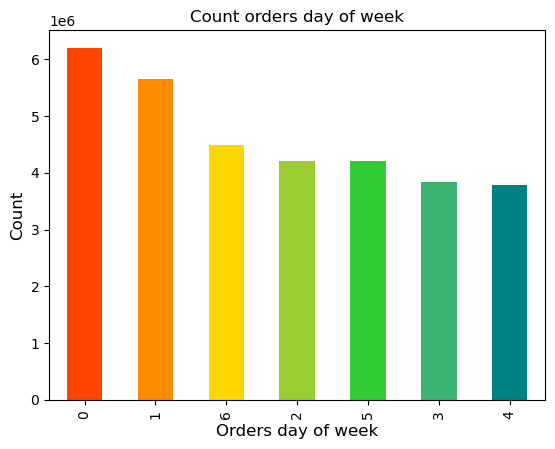

In [10]:
# Code for saving the bar chart within the bar object
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ["orangered", "darkorange", "gold", "yellowgreen", "limegreen", "mediumseagreen", "teal"])

plt.xlabel("Orders day of week", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count orders day of week", fontsize=12)

In [11]:
# Export the visualization it outside
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 2. Creating Histogram & Scatterplot

<Axes: ylabel='Frequency'>

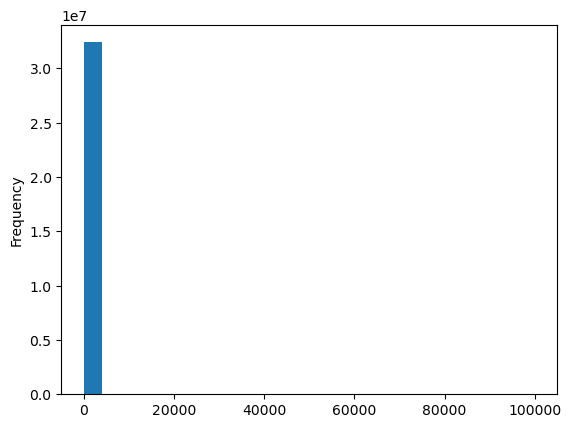

In [12]:
# Creating a histogram of the “prices” column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [13]:
# Runing the describe() function
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

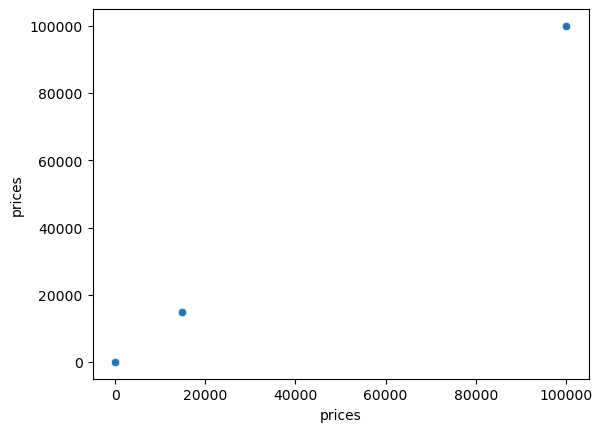

In [14]:
# Create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

### 3. Finding bias and correcting them in the database

In [15]:
# Investigate the he close-to-20,000 value
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,Spending_flag,median_days_order,frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,NaN,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,NaN,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,NaN,Regularly busy,Regularly busy days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,NaN,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,NaN,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,NaN,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,NaN,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,NaN,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,NaN,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [16]:
# Set the maximum number of columns to None
pd.set_option('display.max_columns', None)

In [17]:
# Investigate the he close-to-20,000 value, another try
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,Spending_flag,median_days_order,frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,NaN,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,NaN,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,NaN,Regularly busy,Regularly busy days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,NaN,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,NaN,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,NaN,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,NaN,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,NaN,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,NaN,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [18]:
# Changing extreme values to NaN
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [19]:
# Output check
ords_prods_merge['prices'].max()

25.0

Text(0.5, 1.0, 'Prices frequency')

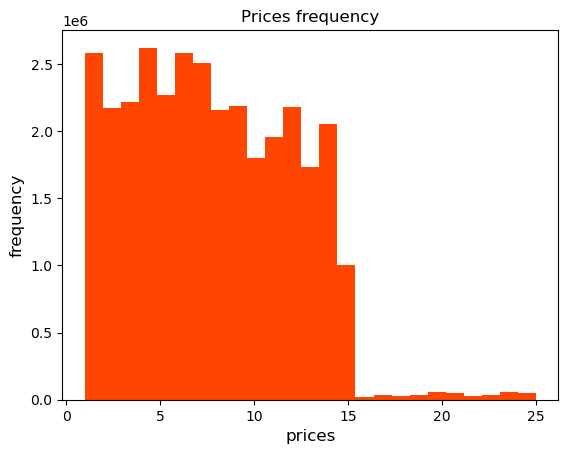

In [20]:
# Creating a new histogram of the “prices” column
hist = ords_prods_merge['prices'].plot.hist(bins = 25, color = 'orangered')

plt.xlabel('prices', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title("Prices frequency", fontsize=12)

Text(0.5, 1.0, 'Prices frequency')

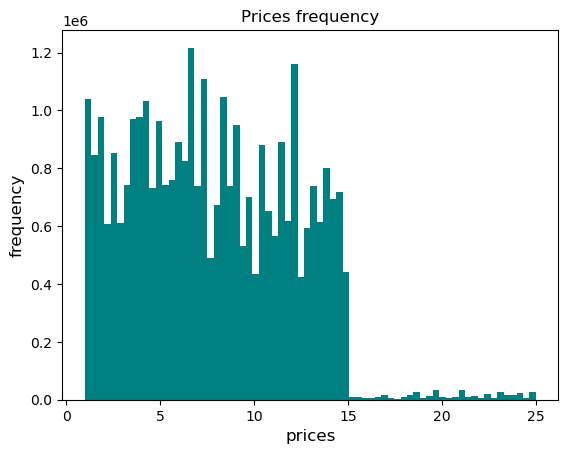

In [21]:
# Creating a new histogram of the “prices” column with another bias number
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70, color = 'teal')

plt.xlabel('prices', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title("Prices frequency", fontsize=12)

In [22]:
# Export the visualization it outside
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_prices.png'))
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist2_orders_prices.png'))

### 4.Sampling Data

In [23]:
# Create a sample, split into two dataframes at a 70/30 ratio
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [24]:
# Output check
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
# List of random numbers between 0 and 1
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [26]:
# Sample 70% of dataframe
big = ords_prods_merge[dev]

In [27]:
# Sample 30% of dataframe
small = ords_prods_merge[~dev]

In [28]:
# Check the results
len(ords_prods_merge)

32404859

In [29]:
# Check the results
len(big) + len(small)

32404859

In [30]:
# Reducing your samples to only those columns necessary for the chart
df_2 = small[['orders_day_of_week','prices']]

### 5.Creating Line Charts

Text(0.5, 1.0, 'Prices and orders day of week')

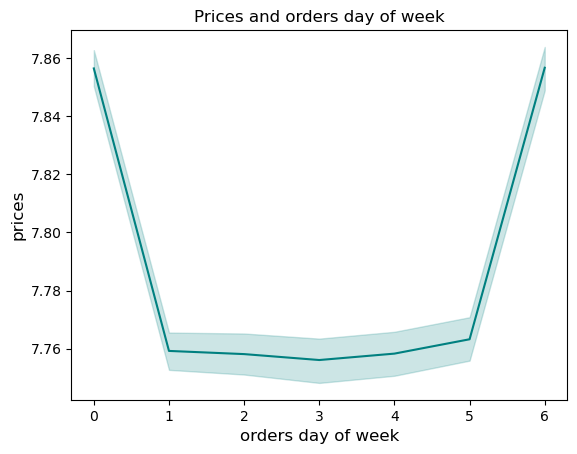

In [31]:
# Create a line chart from the sample
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices', color = 'teal')

plt.xlabel('orders day of week', fontsize=12)
plt.ylabel('prices', fontsize=12)
plt.title("Prices and orders day of week", fontsize=12)

#### INFO : Compare the line chart with the line chart of the entire dataframe to check the outputs

In [32]:
# Export the visualization it outside
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_prices.png'))

In [33]:
# Exporting dataframe in pkl format

ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_visual.pkl'))